# Regresión Logística: Análisis de Combustible Peligroso

Este proyecto utiliza la técnica de regresión logística para analizar un conjunto de datos relacionado con el tratamiento de combustible peligroso. 

### Enunciado del ejercicio:
 
  El objetivo es construir un modelo predictivo que permita identificar ciertas categorías o riesgos asociados al tratamiento de combustibles peligrosos. Para ello, se utiliza un dataset proporcionado en formato `.csv`.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
# Cargar el dataset
df = pd.read_csv('datos/archivo.csv', low_memory=False)

# Mostrar las primeras filas para inspeccionar
print(df.head())

    OBJECTID                 SUID    ORG  ACTIVITY_CODE  \
0  976519744  0904062016306021002  90406           4220   
1  976519745  0904062016306012003  90406           4220   
2  976519746  0904012008439025000  90401           4270   
3  976519747  0904062016306021001  90406           4220   
4  976519748  011101A170300009000  11104           4220   

                  ACTIVITY LOCAL_QUALIFIER  ASU_NBR_UNITS ASU_UOM  \
0          Commercial Thin             NaN           91.0   ACRES   
1          Commercial Thin             NaN          161.0   ACRES   
2  Permanent Land Clearing             NaN          131.2   ACRES   
3          Commercial Thin             NaN           91.0   ACRES   
4          Commercial Thin             NaN           15.0   ACRES   

   ADMIN_REGION_CODE  ADMIN_FOREST_CODE  ...         EDW_INSERT_DATE  \
0                  9                  4  ...  2023/02/04 06:59:52+00   
1                  9                  4  ...  2023/02/04 06:59:52+00   
2             

In [3]:
# Selecciona las columnas relevantes para el análisis
# En este caso seleccionamos columnas numéricas y algunas categóricas
df = df[['ACTIVITY', 'GIS_ACRES', 'SHAPEAREA', 'PURPOSE_CODE', 'SUID']]

# Limpiar los datos: quitar filas con valores nulos
df = df.dropna()

# Codificar las variables categóricas como números (por ejemplo, 'ACTIVITY' y 'PURPOSE_CODE')
label_encoder = LabelEncoder()
df['ACTIVITY'] = label_encoder.fit_transform(df['ACTIVITY'])
df['PURPOSE_CODE'] = label_encoder.fit_transform(df['PURPOSE_CODE'])

# Separar las características (X) y la variable objetivo (y)
X = df[['ACTIVITY', 'GIS_ACRES', 'SHAPEAREA']]  # Características numéricas
y = df['PURPOSE_CODE']  # Variable objetivo

# Dividir en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Crear y entrenar el modelo (regresión logística en este caso)
clf = LogisticRegression()
clf.fit(X_train, y_train)

/home/yoss/anaconda3/envs/simulacion/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [5]:
# Realizar predicciones
y_pred = clf.predict(X_test)

In [6]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.3f}")


Precisión del modelo: 0.620


In [7]:
# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Matriz de confusión:
[[   0    0    0    0    0    3    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    5    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    1    0    0    0    0    0    0    0    0]
 [   0    0    0    2    0  663    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 1842    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 8331    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 2279    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  110    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    1    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    6    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0   15    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0   35    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  114    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0   2

In [8]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         1
           3       1.00      0.00      0.01       665
           4       0.00      0.00      0.00      1842
           5       0.62      1.00      0.77      8331
           6       0.00      0.00      0.00      2279
           7       0.00      0.00      0.00       110
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        35
          13       0.00      0.00      0.00       114
          14       0.00      0.00      0.00        24

    accuracy                           0.62     13431
   macro avg       0.12      0.07      0.06     13431
weighted avg       0.43      0.62      0.48     13431


/home/yoss/anaconda3/envs/simulacion/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yoss/anaconda3/envs/simulacion/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yoss/anaconda3/envs/simulacion/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

## Visualización de los coeficientes

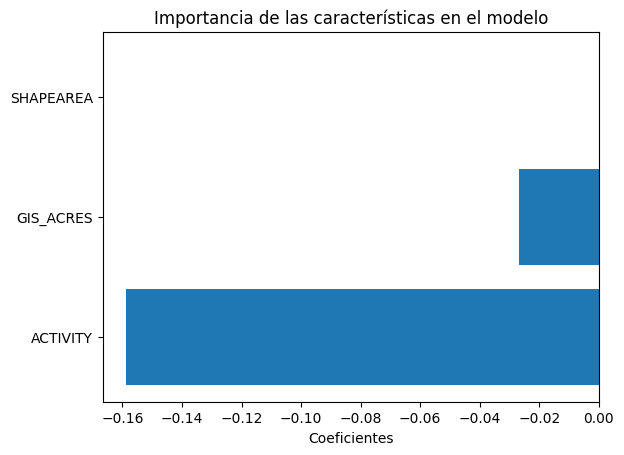

In [9]:
import matplotlib.pyplot as plt

# Visualizar los coeficientes del modelo
coef = clf.coef_[0]
features = X.columns

plt.barh(features, coef)
plt.xlabel('Coeficientes')
plt.title('Importancia de las características en el modelo')
plt.show()
